## Assignment 1
## Grp 10

In [1]:
# Importing libraries

# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import metrics

In [2]:
#Import the dataset

dataset=pd.read_csv("Restaurant_Scores_-_LIVES_Standard.csv")
original_data = dataset.copy()

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   53973 non-null  int64  
 1   business_name                 53973 non-null  object 
 2   business_address              53973 non-null  object 
 3   business_city                 53973 non-null  object 
 4   business_state                53973 non-null  object 
 5   business_postal_code          52787 non-null  object 
 6   business_latitude             27475 non-null  float64
 7   business_longitude            27475 non-null  float64
 8   business_location             27460 non-null  object 
 9   business_phone_number         17672 non-null  float64
 10  inspection_id                 53973 non-null  object 
 11  inspection_date               53973 non-null  object 
 12  inspection_score              39541 non-null  float64
 13  i

## Missing Values Ratio

In [4]:
# checking the percentage of missing values in each variable

dataset.isnull().sum()/len(dataset)*100

business_id                      0.000000
business_name                    0.000000
business_address                 0.000000
business_city                    0.000000
business_state                   0.000000
business_postal_code             2.197395
business_latitude               49.094918
business_longitude              49.094918
business_location               49.122710
business_phone_number           67.257703
inspection_id                    0.000000
inspection_date                  0.000000
inspection_score                26.739296
inspection_type                  0.000000
violation_id                    25.420117
violation_description           25.420117
risk_category                   25.420117
Neighborhoods                   49.169029
SF Find Neighborhoods           49.169029
Current Police Districts        49.146796
Current Supervisor Districts    49.146796
Analysis Neighborhoods          49.146796
dtype: float64

In [5]:
#check if any are more than the threshold
null_percentages = dataset.isnull().sum()/len(dataset)*100

# saving column names in a variable
features = dataset.columns
feature = [ ]

for i in range(0,len(null_percentages)):
    if null_percentages[i]>=40:   #setting the threshold value, i.e 40%
        feature.append(features[i])

In [6]:
print(len(feature))
print(feature)

9
['business_latitude', 'business_longitude', 'business_location', 'business_phone_number', 'Neighborhoods', 'SF Find Neighborhoods', 'Current Police Districts', 'Current Supervisor Districts', 'Analysis Neighborhoods']


In [7]:
## let's check the columns that have higher than the threshhold 40% of nulls
null_features = dataset.columns
null_feature = [ ]

for i in range(0,len(null_percentages)):
    if null_percentages[i]>=40:   #setting the threshold value, i.e 40%
        null_feature.append(features[i])
print(len(null_feature))
print(null_feature)

9
['business_latitude', 'business_longitude', 'business_location', 'business_phone_number', 'Neighborhoods', 'SF Find Neighborhoods', 'Current Police Districts', 'Current Supervisor Districts', 'Analysis Neighborhoods']


In [8]:
## since the columsn that have more thabn 40% null values in their data are 
##not importnat features in building the machine learning model, then we will bbe droping them

dataset = dataset.loc[:, ~dataset.columns.isin(null_feature)] ##select all columns except null_feature

In [9]:
dataset.isnull().sum()/len(dataset)*100

business_id               0.000000
business_name             0.000000
business_address          0.000000
business_city             0.000000
business_state            0.000000
business_postal_code      2.197395
inspection_id             0.000000
inspection_date           0.000000
inspection_score         26.739296
inspection_type           0.000000
violation_id             25.420117
violation_description    25.420117
risk_category            25.420117
dtype: float64

In [10]:
#check the percentage of rows that have null values

(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

8.092080228148262

In [11]:
## let's drop the unique id's in the dataset and other meta data (string) that are not in use

dataset.drop(['violation_id', 'violation_description'], axis = 1, inplace=True)
dataset.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,inspection_id,inspection_date,inspection_score,inspection_type,risk_category
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,835_20180917,09/17/2018 12:00:00 AM,88.0,Routine - Unscheduled,Low Risk
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,94108,905_20190415,04/15/2019 12:00:00 AM,87.0,Routine - Unscheduled,High Risk
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,94118,1203_20170803,08/03/2017 12:00:00 AM,77.0,Routine - Unscheduled,Moderate Risk
3,1345,Cordon Bleu,1574 California St,San Francisco,CA,94109,1345_20170928,09/28/2017 12:00:00 AM,81.0,Routine - Unscheduled,High Risk
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,94114,1352_20180620,06/20/2018 12:00:00 AM,74.0,Routine - Unscheduled,Low Risk


In [12]:
## let's check the null percentage again

dataset.isnull().sum()/len(dataset)*100

business_id              0.000000
business_name            0.000000
business_address         0.000000
business_city            0.000000
business_state           0.000000
business_postal_code     2.197395
inspection_id            0.000000
inspection_date          0.000000
inspection_score        26.739296
inspection_type          0.000000
risk_category           25.420117
dtype: float64

In [13]:
## we can see that inspection_score has more than 25% of nulls we can replace the nulls with the mean

dataset["inspection_score"].fillna(dataset["inspection_score"].mean(), inplace=True)

In [14]:
## let's check the null percentage again

dataset.isnull().sum()/len(dataset)*100

business_id              0.000000
business_name            0.000000
business_address         0.000000
business_city            0.000000
business_state           0.000000
business_postal_code     2.197395
inspection_id            0.000000
inspection_date          0.000000
inspection_score         0.000000
inspection_type          0.000000
risk_category           25.420117
dtype: float64

In [15]:
## let's look into our target "risk_category"
dataset["risk_category"].value_counts()

Low Risk         19112
Moderate Risk    15316
High Risk         5825
Name: risk_category, dtype: int64

In [16]:
## We can replace the null values using the mode funciton here since it's categorical values
dataset["risk_category"].fillna(dataset["risk_category"].mode()[0], inplace=True)
## let's check the null percentage again

dataset.isnull().sum()/len(dataset)*100

business_id             0.000000
business_name           0.000000
business_address        0.000000
business_city           0.000000
business_state          0.000000
business_postal_code    2.197395
inspection_id           0.000000
inspection_date         0.000000
inspection_score        0.000000
inspection_type         0.000000
risk_category           0.000000
dtype: float64

In [17]:
#check the percentage of rows that have null values

(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

0.1997631812539266

In [18]:
#Since the percentage of null values is negligible we can drop those

dataset = dataset.dropna(axis=0)

#check the percentage of rows that have null values

(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

0.0

In [19]:
# let's take a cleaned veriosn for power bi analysis
dataset.to_csv("cleaned_data.csv", sep=',')

In [20]:
#data transformation of categorical variables
print("inspection_type: \n")
print(dataset["inspection_type"].value_counts(), "\n")
print("risk_category: \n")
print(dataset["risk_category"].value_counts())

inspection_type: 

Routine - Unscheduled                38807
Reinspection/Followup                 6621
Complaint                             2377
New Ownership                         1877
New Construction                       976
Non-inspection site visit              841
New Ownership - Followup               529
Structural Inspection                  240
Complaint Reinspection/Followup        228
Foodborne Illness Investigation        202
Routine - Scheduled                     73
Special Event                            8
Administrative or Document Review        4
Multi-agency Investigation               3
Community Health Assessment              1
Name: inspection_type, dtype: int64 

risk_category: 

Low Risk         32036
Moderate Risk    15044
High Risk         5707
Name: risk_category, dtype: int64


In [21]:
#data transformation of categorical variables
dataset.replace({'risk_category':{'Low Risk':0,'Moderate Risk':1,'High Risk':2
                                 
                                 }, 'inspection_type':{'Routine - Unscheduled':0,
                                                       'Reinspection/Followup':1,
                                                       'Complaint':2,
                                                       'New Ownership':3,
                                                       'New Construction':4,
                                                       'Non-inspection site visit':5,
                                                       'New Ownership - Followup':6,
                                                       'Structural Inspection':7,
                                                       'Complaint Reinspection/Followup':8,
                                                       'Foodborne Illness Investigation':9,
                                                       'Routine - Scheduled':10,
                                                       'Special Event':11,
                                                       'Administrative or Document Review':12,
                                                       'Multi-agency Investigation':13,
                                                       'Community Health Assessment':14
                                                      }}, inplace=True)

## Low Variance Filter

In [22]:
#check the variance 

dataset.var()

business_id         1.317446e+09
inspection_score    5.289064e+01
inspection_type     2.242652e+00
risk_category       4.662348e-01
dtype: float64

In [23]:
#business_id has the least variance so we can safely drop this

dataset=dataset.drop(['business_id'],axis=1)

In [24]:
dataset.head()

,business_name,business_address,business_city,business_state,business_postal_code,inspection_id,inspection_date,inspection_score,inspection_type,risk_category
0,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,835_20180917,09/17/2018 12:00:00 AM,88.0,0,0
1,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,94108,905_20190415,04/15/2019 12:00:00 AM,87.0,0,2
2,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,94118,1203_20170803,08/03/2017 12:00:00 AM,77.0,0,1
3,Cordon Bleu,1574 California St,San Francisco,CA,94109,1345_20170928,09/28/2017 12:00:00 AM,81.0,0,2
4,LA TORTILLA,495 Castro St B,San Francisco,CA,94114,1352_20180620,06/20/2018 12:00:00 AM,74.0,0,0


In [25]:
# remove Insignificant columns that wont contribute to the prediction of our model

print(dataset["business_city"].value_counts())
print(dataset["business_state"].value_counts())

San Francisco    52787
Name: business_city, dtype: int64
CA    52787
Name: business_state, dtype: int64


In [26]:
dataset = dataset.drop(columns = ['business_name','business_address','business_city',
                                     'business_state', 'business_postal_code',
                                    'inspection_id', 'inspection_date'],axis=1)
dataset.head()

,inspection_score,inspection_type,risk_category
0,88.0,0,0
1,87.0,0,2
2,77.0,0,1
3,81.0,0,2
4,74.0,0,0


## High Correlation Filter

In [27]:
#checking the correlation

dataset.corr()

,inspection_score,inspection_type,risk_category
inspection_score,1.00000,0.002320,-0.271810
inspection_type,0.00232,1.000000,-0.223269
risk_category,-0.27181,-0.223269,1.000000


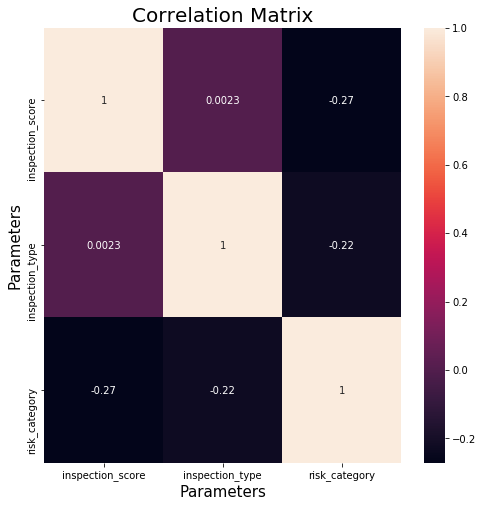

In [28]:
#Making a heatmap

plt.figure(figsize = (8, 8))
sns.heatmap(dataset.corr(), annot = True)
plt.title('Correlation Matrix', fontsize = 20)
plt.xlabel('Parameters', fontsize = 15) 
plt.ylabel('Parameters', fontsize = 15) 
plt.show()

In [29]:
## we can see that this approach won't help as there's no much of a correlation between the features

## Random Forest

In [30]:
#drop the target variable type and load this data into another dataframe

df=dataset.drop(['risk_category'],axis=1)

In [31]:
#import the package for random forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df,dataset.risk_category)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

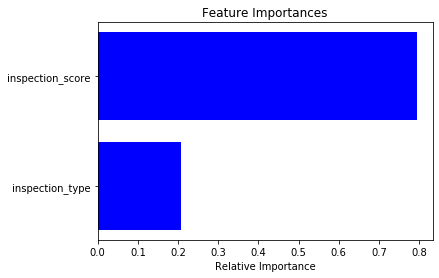

In [32]:
#Build the graph to check feature importance

features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [33]:
## let's move forward and check the next approach

## Backward Feature Extraction

In [34]:
#import the feature selection libraries and linear regression libraries 

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lreg = LinearRegression()
rfe = RFE(lreg,n_features_to_select=2)
rfe = rfe.fit(df, dataset.risk_category)

In [35]:
#check the retained column names

x_rfe = df[df.columns[rfe.support_]]
print(x_rfe.columns)

Index(['inspection_score', 'inspection_type'], dtype='object')


## Forward Feature Selection

In [36]:
#import the required libraries for forward selection

from sklearn.feature_selection import f_regression
ffs = f_regression(x_rfe,dataset.risk_category )

In [37]:
#Take the top most variables after the forward selection process

final_features = [ ]
for i in range(0,len(x_rfe.columns)-1):
    if ffs[0][i] >=10:
        final_features.append(df.columns[i])

In [38]:
final_features

['inspection_score']

In [39]:
## we can see that the inspection rate is the most optimal featrue 
##after going through the dimensionality reduction steps

### Decision Tree Clasifier Model Building

In [40]:
#importing the decision tree module 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [41]:
## let's round inspection_score to two decimals
## chnaging the labels from 0,1, and 2 to 0,1
# dataset[dataset["risk_category"] != 1]  

## now chaing the values to only 1, and 0
dataset["risk_category"].replace(2,1, inplace=True)

dataset["inspection_score"] = dataset["inspection_score"].round(decimals=2)

In [42]:
## split the data into training and testing
feature_data = dataset.drop(['risk_category'],axis=1)
target = dataset.risk_category
train_X, val_X, train_y, val_y = train_test_split(feature_data, target,test_size=0.2, random_state = 0)
print(train_X.shape)
print(val_X.shape)
print(train_y.shape)
print(val_y.shape)

(42229, 2)
(10558, 2)
(42229,)
(10558,)


In [43]:
# Define model
DT_model = DecisionTreeClassifier()
DT_model.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
# Predict with the test data
Y_pred = DT_model.predict(val_X)
print(Y_pred)

[0 0 0 ... 1 1 1]


## Evaluation of the performance of the Decision Tree Clasifier

In [45]:
acc_dt = round(DT_model.score(train_X, train_y)*100,2)
print(acc_dt)

69.39


In [46]:
## Let's try the features taken based on the Forward Feature Selection

In [47]:
## split the data into training and testing
feature_data = dataset[["inspection_score"]]
target = dataset.risk_category
train_X, val_X, train_y, val_y = train_test_split(feature_data, target,test_size=0.2, random_state = 0)
# Define model
DT_model = DecisionTreeClassifier()
DT_model.fit(train_X, train_y)
# Predict with the test data
Y_pred = DT_model.predict(val_X)
print(Y_pred)


acc_dt = round(DT_model.score(train_X, train_y)*100,2)
print(acc_dt)

[0 0 0 ... 1 1 1]
69.39


In [48]:
## still the same...

## Linear Regression Model

In [49]:
#import the sklearn for data set, linear regression model and also to split the train and test data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [50]:
dataset

,inspection_score,inspection_type,risk_category
0,88.00,0,0
1,87.00,0,1
2,77.00,0,1
3,81.00,0,1
4,74.00,0,0
...,...,...,...
53968,85.00,0,1
53969,86.22,1,0
53970,86.22,1,0
53971,86.22,1,0


### Model Building

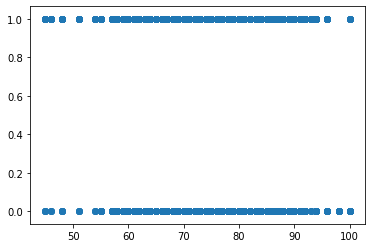

In [51]:
# data preparation 
# taking inspection score as feature

feature = dataset[['inspection_score']]
target = dataset.risk_category
plt.scatter(feature,target)

In [52]:
x = dataset[['inspection_score']]  # feature variable
y = dataset.risk_category          # target variable

In [53]:
# split the training and test data set in 80% : 20%
# assign random_state to 5

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42229, 1)
(10558, 1)
(42229,)
(10558,)


In [54]:
#creating the linear regression model

linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction

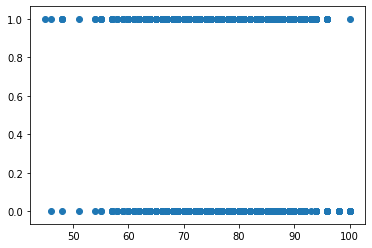

In [55]:
y_pred = linear_model.predict(x_test)
plt.scatter(x_test,y_test)


### Evaluating Performance

In [56]:
Linear_Regression_Score = linear_model.score(x_test, y_test)
print(linear_model.score(x_test, y_test))

0.0534321677770091


In [57]:
print(mean_squared_error(y_test,y_pred))

0.22684712611270944


## Linear Regression for feature 'Inspection type' 


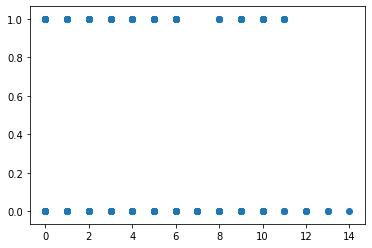

In [58]:
# Model building and data preparation 
# taking inspection type as feature

feature = dataset[['inspection_type']]
target = dataset['risk_category']
plt.scatter(feature,target,marker='o')
plt.show()

In [59]:
x = dataset[['inspection_type']]   # feature variable
y = dataset['risk_category']       #target variable

In [60]:
# split the training and test data set in 80% : 20%
# assign random_state to 5

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42229, 1)
(10558, 1)
(42229,)
(10558,)


In [61]:
#creating the linear regression model

linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction 

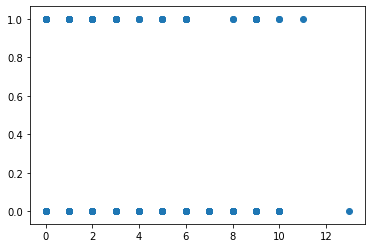

In [62]:
y_pred = linear_model.predict(x_test)
plt.scatter(x_test,y_test)

### Evaluating Performance

In [63]:
Linear_score = linear_model.score(x_test, y_test)*100
print(linear_model.score(x_test, y_test)*100)

6.577147654737702


In [64]:
print(mean_squared_error(y_test,y_pred))

0.22388998280243907


### Logistic Regression Model Building

In [65]:
# do the normalization on the data for more easier converagence
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataset[['inspection_score']])
X = pd.DataFrame(x_scaled)

In [66]:
# Train the data 80% trainng and 20% Testing
from sklearn.model_selection import train_test_split
# feature_data = dataset[['inspection_score']]
target = dataset.risk_category
train_X, val_X, train_y, val_y = train_test_split(X, target,test_size=0.2, random_state = 5)

In [67]:
# Importing Libraries 
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

# fit the model with data
logistic_regression.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
#Do the prediction for the test data

y_pred=logistic_regression.predict(val_X)


In [69]:
X

,0
0,0.781818
1,0.763636
2,0.581818
3,0.654545
4,0.527273
...,...
52782,0.727273
52783,0.749455
52784,0.749455
52785,0.749455


In [70]:
type(y_pred)

numpy.ndarray

In [71]:
val_X[0]

38473    0.749455
40794    0.749455
26745    0.763636
13614    0.890909
30432    0.749455
           ...   
44712    0.749455
20808    0.927273
26938    0.581818
35167    0.545455
50526    0.800000
Name: 0, Length: 10558, dtype: float64

/Users/m.mraisi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/m.mraisi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/m.mraisi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


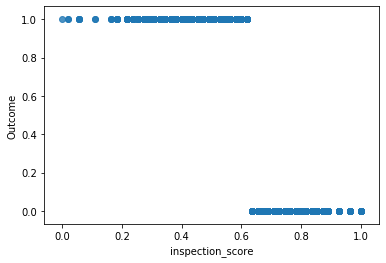

In [72]:
#visualising the graph of every variable against the outcome variable


plt.title("")
plt.xlabel("labels")
ax=sns.regplot(x=val_X[0], y=y_pred, logistic=True,ci=None,line_kws={'color':'red'})
ax.set(xlabel='inspection_score', ylabel='Outcome')
plt.show()

In [73]:
print(y_pred)

[0 0 0 ... 1 1 0]


In [74]:
confusion_matrix = metrics.confusion_matrix(val_y, y_pred)
print(confusion_matrix)

[[5793  560]
 [3153 1052]]


Text(0.5, 15.0, 'Predicted label')

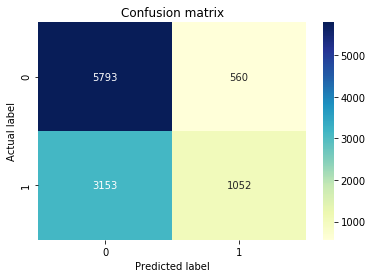

In [75]:
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
Logistic_accuracy = metrics.accuracy_score(val_y, y_pred)
print("Accuracy:",metrics.accuracy_score(val_y, y_pred))
print("Precision:",metrics.precision_score(val_y, y_pred))
print("Recall:",metrics.recall_score(val_y, y_pred))

Accuracy: 0.6483235461261603
Precision: 0.652605459057072
Recall: 0.2501783590963139


In [77]:
dataset[dataset["risk_category"]==2]

,inspection_score,inspection_type,risk_category


In [78]:
dataset["risk_category"].value_counts()

0    32036
1    20751
Name: risk_category, dtype: int64

### K means clustering

In [79]:
from sklearn.cluster import KMeans
%matplotlib inline

In [80]:
x_kmeans = dataset.drop(["risk_category"], axis=1)
y_kmeans = dataset[["risk_category"]]

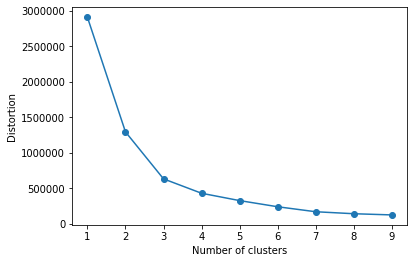

In [81]:
# Building the elbow graph for the k value

distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x_kmeans)
    distortions.append(km.inertia_)

# plotting the graph

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [82]:
#since the elbow method is best on 3 number of clusters, we sould go with that
#but since we converted the labels into 0 and 1, we decide to choose 2 clusters

Kmeans_model=KMeans(n_clusters=2)
Kmeans_model.fit(x_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [83]:
#To get the centroids of the clusters

Kmeans_model.cluster_centers_

array([[8.90492513e+01, 8.30507252e-01],
       [7.55504014e+01, 1.63202785e-13]])

In [84]:
#Can also predict using the normal predict method

Kmeans_model.predict(x_kmeans)

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [85]:
#The predicted classes

y_pred=Kmeans_model.labels_
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

### SVM model building

In [86]:
#Import the required modules from the sklearn for model building, evaluating performance

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [87]:
#Split the data into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(dataset[["inspection_score"]], dataset.risk_category, test_size = 0.2)

In [88]:
#Create the SVM model
SVM = SVC(kernel = 'sigmoid', random_state = 0)

#Fit the model for the data
SVM.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [89]:
#Make the prediction
y_pred = SVM.predict(X_test)

In [90]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
#Performance evaluation using confusion matrix

confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[6461    0]
 [4097    0]]


Text(0.5, 15.0, 'Predicted label')

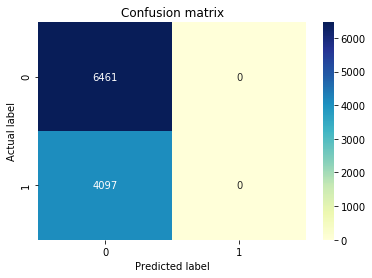

In [92]:
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [93]:
#Accuracy of the model by cross validation score

SVM_accuracy = cross_val_score(estimator = SVM, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(SVM_accuracy.mean()*100))

Accuracy: 60.56 %


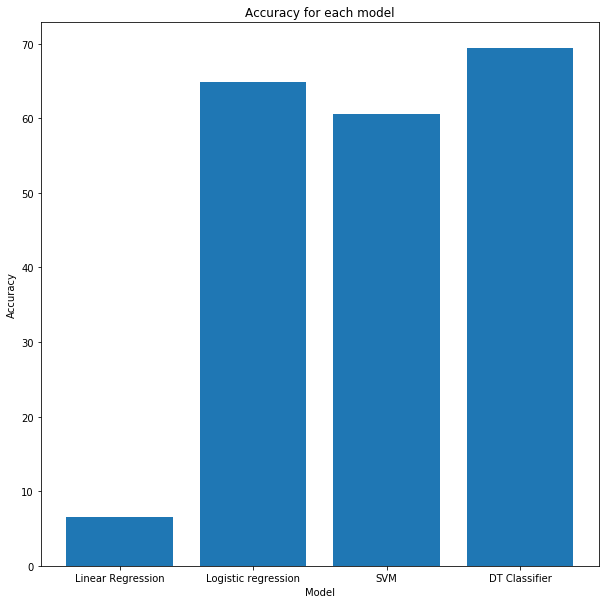

In [107]:
xax = ["Linear Regression", "Logistic regression", "SVM", "DT Classifier"]
tscores = []
tscores.append(Linear_score)
tscores.append(Logistic_accuracy*100)
tscores.append(SVM_accuracy[1]*100)
tscores.append(acc_dt)
        


plt.figure(figsize=(10,10))
plt.bar(xax, tscores)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title('Accuracy for each model')
plt.show()

It is clearly visible with the results that DT model is the best model for our dataset.